In [274]:
import pandas as pd
import numpy as np
from dstapi import DstApi

import ipywidgets as widgets
from IPython.display import display,clear_output
import matplotlib.pyplot as plt
import time

In [28]:
ind = DstApi('FOLK1A')

In [32]:
tabsum = ind.tablesummary()

for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable))

Table FOLK1A: Folketal den 1. i kvartalet efter område, køn, alder, civilstand og tid
Last update: 2023-02-10T08:00:00
OMRÅDE:


,id,text
0,000,Hele landet
1,084,Region Hovedstaden
2,101,København
3,147,Frederiksberg
4,155,Dragør
...,...,...
100,773,Morsø
101,840,Rebild
102,787,Thisted
103,820,Vesthimmerlands


KØN:


,id,text
0,TOT,I alt
1,1,Mænd
2,2,Kvinder


ALDER:


,id,text
0,IALT,I alt
1,0,0 år
2,1,1 år
3,2,2 år
4,3,3 år
...,...,...
122,121,121 år
123,122,122 år
124,123,123 år
125,124,124 år


CIVILSTAND:


,id,text
0,TOT,I alt
1,U,Ugift
2,G,Gift/separeret
3,E,Enke/enkemand
4,F,Fraskilt


Tid:


,id,text
0,2008K1,2008K1
1,2008K2,2008K2
2,2008K3,2008K3
3,2008K4,2008K4
4,2009K1,2009K1
...,...,...
56,2022K1,2022K1
57,2022K2,2022K2
58,2022K3,2022K3
59,2022K4,2022K4


In [63]:
kom = []
for row, value in zip(ind.variable_levels('OMRÅDE')['id'],ind.variable_levels('OMRÅDE')['text']):
    if 'Region' not in value:
        kom.append(row)

In [66]:
params = {'table':'FOLK1A',
         'format':"BULK",
         'variables':[{'code':'OMRÅDE','values':kom},
                     {'code':'KØN','values':['*']},
                     {'code':'ALDER','values':['*']},
                     {'code':'Tid','values':['*']},
                     {'code':'CIVILSTAND','values':['TOT']}]}
data= ind.get_data(params)

In [265]:
data = pd.read_csv('FOLK1A',index_col=[0])
data['TID'] = pd.to_datetime(data.reset_index()['TID'].apply(change_format))
#data.resample('Y').last()
data = data[data['KØN']=='I alt'][['TID','OMRÅDE','ALDER','INDHOLD']]
data['ÅR'] = data['TID'].dt.year
data = data.groupby(['ÅR','OMRÅDE','ALDER']).last()
data = data.reset_index()
data = data.drop(columns = ['TID'])
data['ÅR'] = data['ÅR'].astype(int)
data = data[data['ALDER'] != 'I alt']
data['ALDER'] = data['ALDER'].str.strip(' år')
data['ALDER'] = data['ALDER'].astype(int)

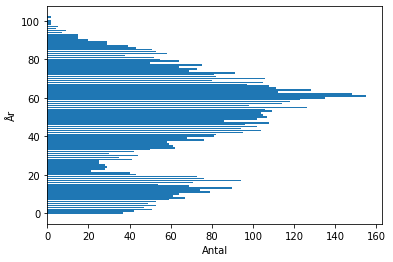

<Figure size 432x288 with 0 Axes>

In [267]:
filtered_df = data[data['ÅR'] == 2008]
filtered_df = filtered_df[filtered_df['OMRÅDE']=='Ærø']

# Create the bar plot
plt.barh(filtered_df['ALDER'].unique(),filtered_df['INDHOLD'])
plt.xlabel("Antal")
plt.ylabel("År")
plt.show()
plt.tight_layout()


In [286]:
def plot_graph(year,municipal):
    # Filter the DataFrame based on the selected year
    filtered_df = data[data['ÅR'] == year]
    filtered_df = filtered_df[filtered_df['OMRÅDE']==municipal]

    # Create the bar plot
    plt.barh(filtered_df['ALDER'].unique(),filtered_df['INDHOLD'])
    plt.title(f"Values for year {year}")
    plt.xlabel("Antal")
    plt.ylabel("År")
    plt.show()
    plt.tight_layout()

# Create the year slider
year_slider = widgets.IntSlider(
    value=data['ÅR'].min(),
    min=data['ÅR'].min(),
    max=data['ÅR'].max(),
    step=1,
    description="Year:",
    continuous_update=False,
)

municipal_slider = widgets.Dropdown(
    options=data['OMRÅDE'].unique(),
    value='Ærø',
    description='Municipal:',
    disabled=False,
)


# Create an interactive widget to update the graph based on the year slider
widgets.interactive(plot_graph, year=year_slider,municipal=municipal_slider)

#for year in range(data['ÅR'].min(), data['ÅR'].max() + 1):
#    year_slider.value = year
#    plot_graph(year)
#    time.sleep(0.2)  
#    clear_output(wait=True)

interactive(children=(IntSlider(value=2008, continuous_update=False, description='Year:', max=2023, min=2008),…

Obtaining file:///Users/frederikfindsen/Documents/%C3%98konomi/10.%20Semester/Introduction%20to%20Numerical%20Program/dstapi
  Running setup.py develop for dstapi
Note: you may need to restart the kernel to use updated packages.


In [1]:
from dstapi import DstApi

In [283]:
ind = DstApi('REGK11')

params = {'table':'REGK11',
         'format':"BULK",
         'variables':[{'code':'OMRÅDE','values':kom},
                     {'code':'PRISENHED','values':['INDL']},
                     {'code':'DRANST','values':['1']},
                     {'code':'FUNK1','values':['4']},
                     {'code':'ART','values':['TOT']},
                     {'code':'TID','values':['>2007']}]}
data_2 = ind.get_data(params)

data_2.drop(columns=['PRISENHED', 'DRANST', 'FUNK1', 'ART'],inplace=True)

data_2.rename(columns={'INDHOLD':'SUNDHEDSUDGIFTER'},inplace=True)

KeyError: "['PRISENHED', 'DRANST', 'FUNK1', 'ART'] not found in axis"